# CSN8010_Lab1 - Linear Regression California Housing

## Analyzing the problem

The aim of this report is to understand the features that directly affect house prices in California (the dependent variable). For this, I will create 3 linear regression models using different features (independent variables), then compare the results between them, to see which one best predicts the median house value.

The California Housing dataset contains more than 20,000 rows of information about house prices.

In [18]:
# from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data Collection
Source: Data from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [4]:
# Load csv into df
data_housing_ca = pd.read_csv('data/housing.csv')
#Showing first 5 rows
data_housing_ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Exploration (EDA)

### Statistics
This section will explore the data, showing some basic statistics and plots.

In [5]:
# The following function will show statistics of the dataset
data_housing_ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The average value of our dependent variable (house value) is 206,855.8 with a std of 115395.61. Showing spread in house prices.

### Plotting Data
Visual plots for each independent variable with Seaborn.

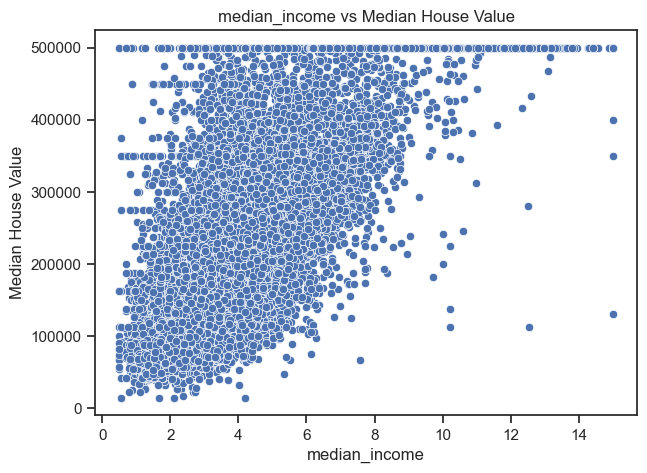

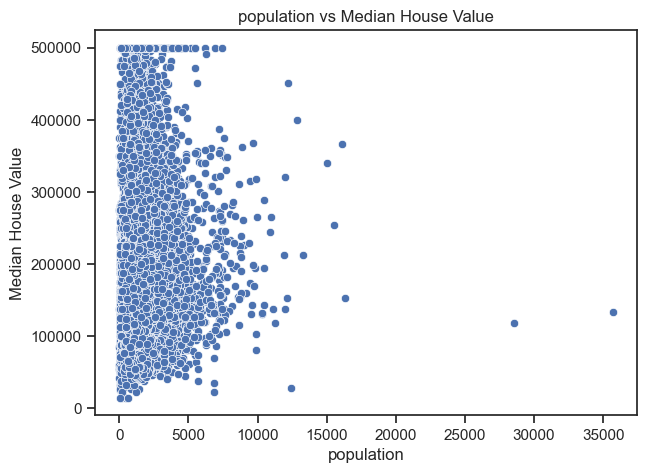

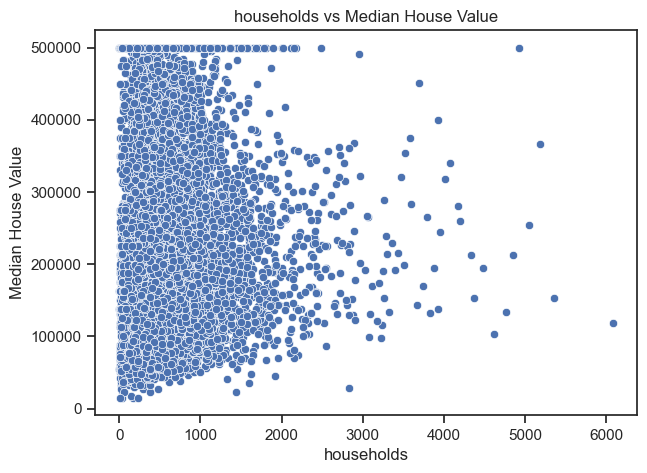

In [30]:
sns.set_theme(style="ticks")

for col in ["median_income","population","households"]: #Our independent variables
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=data_housing_ca, x=col, y="median_house_value")
    plt.title(f"{col} vs Median House Value") 
    plt.xlabel(col)
    plt.ylabel('Median House Value')
    # plt.tight_layout()
    plt.show()



### Interpretation

Based on those scatter plots, it is possible to see a clear positive correlation with the dependent variable, which means that the higher the average income, the higher the house value. Both household and population seem to have a weak or no linear relationship. Apparently, the median income could be a good predictor.

The idea is to fit a univariate linear regression model for each of the three variables, then compare their prediction errors and finally see if the Median Income has the strongest linear relationship with house value.



### Description of the Variables Used in the ULR

- **median_house_value**: This is the dependent variable. It ranges from 14,999 to 500,001. The std is 115K indicating data is spread. 50% of data are below 180, almost near the mean.

- **median_income**: The mean is higher than the 50th percentile, so the distribution is probably right-skewed. Some outliers might be present, or there could be people with very high incomes affecting the mean.

- **Population**: There are two visible outliers. The range goes from very small populations (3) to over 35,000 people, indicating high variability in population density. The standard deviation is also very high (1,132), showing that the data is widely spread.

- **Households**: the number of households is very spread out, as the standard deviation is 382, which is almost as high as the mean (499). This also suggests the presence of some significant outliers.





# Prepare Data

# Choice of a Model Architecture
*dependent variable:* median house value
*independent variables:*
- median income
- population
- number of households

# Definition of a Loss Function

# Preesent Solution